<a href="https://colab.research.google.com/github/AayushKucheria/Reaktor-Communicating-Climate-Change/blob/main/Data%20exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring the "Our World in Data" dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Download the data from the github repository

In [2]:
url = 'https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv'
df = pd.read_csv(url)

df.head(10)

,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,share_global_co2,cumulative_co2,share_global_cumulative_co2,co2_per_gdp,consumption_co2_per_gdp,co2_per_unit_energy,coal_co2,cement_co2,flaring_co2,gas_co2,oil_co2,other_industry_co2,cement_co2_per_capita,coal_co2_per_capita,flaring_co2_per_capita,gas_co2_per_capita,oil_co2_per_capita,other_co2_per_capita,trade_co2_share,share_global_cement_co2,share_global_coal_co2,share_global_flaring_co2,share_global_gas_co2,share_global_oil_co2,share_global_other_co2,cumulative_cement_co2,cumulative_coal_co2,cumulative_flaring_co2,cumulative_gas_co2,cumulative_oil_co2,cumulative_other_co2,share_global_cumulative_cement_co2,share_global_cumulative_coal_co2,share_global_cumulative_flaring_co2,share_global_cumulative_gas_co2,share_global_cumulative_oil_co2,share_global_cumulative_other_co2,total_ghg,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,AFG,Afghanistan,1949,0.015,NaN,NaN,NaN,NaN,0.002,NaN,0.0,0.015,0.0,NaN,NaN,NaN,0.015,NaN,NaN,NaN,NaN,NaN,NaN,0.002,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.015,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7624058.0,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1950,0.084,NaN,475.00,0.070,NaN,0.011,NaN,0.0,0.099,0.0,0.009,NaN,NaN,0.021,NaN,NaN,NaN,0.063,NaN,NaN,0.003,NaN,NaN,0.008,NaN,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.036,NaN,NaN,0.063,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7752117.0,9.421400e+09,NaN,NaN,NaN
2,AFG,Afghanistan,1951,0.092,NaN,8.70,0.007,NaN,0.012,NaN,0.0,0.191,0.0,0.010,NaN,NaN,0.026,NaN,NaN,NaN,0.066,NaN,NaN,0.003,NaN,NaN,0.008,NaN,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.061,NaN,NaN,0.129,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7840151.0,9.692280e+09,NaN,NaN,NaN
3,AFG,Afghanistan,1952,0.092,NaN,0.00,0.000,NaN,0.012,NaN,0.0,0.282,0.0,0.009,NaN,NaN,0.032,NaN,NaN,NaN,0.060,NaN,NaN,0.004,NaN,NaN,0.008,NaN,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.093,NaN,NaN,0.189,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7935996.0,1.001732e+10,NaN,NaN,NaN
4,AFG,Afghanistan,1953,0.106,NaN,16.00,0.015,NaN,0.013,NaN,0.0,0.388,0.0,0.010,NaN,NaN,0.038,NaN,NaN,NaN,0.068,NaN,NaN,0.005,NaN,NaN,0.008,NaN,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.131,NaN,NaN,0.257,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8039684.0,1.063052e+10,NaN,NaN,NaN
5,AFG,Afghanistan,1954,0.106,NaN,0.00,0.000,NaN,0.013,NaN,0.0,0.495,0.0,0.010,NaN,NaN,0.043,NaN,NaN,NaN,0.064,NaN,NaN,0.005,NaN,NaN,0.008,NaN,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.174,NaN,NaN,0.321,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8151316.0,1.086636e+10,NaN,NaN,NaN
6,AFG,Afghanistan,1955,0.154,NaN,44.83,0.048,NaN,0.019,NaN,0.0,0.649,0.0,0.014,NaN,NaN,0.062,NaN,NaN,NaN,0.092,NaN,NaN,0.008,NaN,NaN,0.011,NaN,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.236,NaN,NaN,0.413,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8270992.0,1.107819e+10,NaN,NaN,NaN
7,AFG,Afghanistan,1956,0.183,NaN,19.05,0.029,NaN,0.022,NaN,0.0,0.832,0.0,0.016,NaN,NaN,0.062,NaN,NaN,NaN,0.121,NaN,NaN,0.007,NaN,NaN,0.014,NaN,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.298,NaN,NaN,0.534,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8398873.0,1.158124e+10,NaN,NaN,NaN
8,AFG,Afghanistan,1957,0.293,NaN,60.00,0.110,NaN,0.034,NaN,0.0,1.125,0.0,0.025,NaN,NaN,0.077,NaN,NaN,NaN,0.216,NaN,NaN,0.009,NaN,NaN,0.025,NaN,NaN,NaN,0.0,NaN,NaN,0.01,NaN,NaN,0.375,NaN,NaN,0.750,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8535157.0,1.157897e+10,NaN,NaN,NaN
9,AFG,Afghanistan,1958,0.330,NaN,12.50,0.037,NaN,0.038,NaN,0.0,1.455,0.0,0.027,NaN,NaN,0.092,NaN,NaN,NaN,0.238,NaN,NaN,0.011,NaN,NaN,0.027,NaN,NaN,NaN,0.0,NaN,NaN,0.01,NaN,NaN,0.467,NaN,NaN,0.988,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8680097.0,1.223884e+10,NaN,NaN,NaN


In [3]:
df[df.country == "Europe"]

,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,share_global_co2,cumulative_co2,share_global_cumulative_co2,co2_per_gdp,consumption_co2_per_gdp,co2_per_unit_energy,coal_co2,cement_co2,flaring_co2,gas_co2,oil_co2,other_industry_co2,cement_co2_per_capita,coal_co2_per_capita,flaring_co2_per_capita,gas_co2_per_capita,oil_co2_per_capita,other_co2_per_capita,trade_co2_share,share_global_cement_co2,share_global_coal_co2,share_global_flaring_co2,share_global_gas_co2,share_global_oil_co2,share_global_other_co2,cumulative_cement_co2,cumulative_coal_co2,cumulative_flaring_co2,cumulative_gas_co2,cumulative_oil_co2,cumulative_other_co2,share_global_cumulative_cement_co2,share_global_cumulative_coal_co2,share_global_cumulative_flaring_co2,share_global_cumulative_gas_co2,share_global_cumulative_oil_co2,share_global_cumulative_other_co2,total_ghg,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
7502,NaN,Europe,1750,9.351,NaN,NaN,NaN,NaN,1.007,NaN,100.00,9.351,100.00,NaN,NaN,NaN,9.351,NaN,NaN,NaN,NaN,NaN,NaN,1.007,NaN,NaN,NaN,NaN,NaN,NaN,100.00,NaN,NaN,NaN,NaN,NaN,9.351,NaN,NaN,NaN,NaN,NaN,100.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150305974.0,NaN,NaN,NaN,NaN
7503,NaN,Europe,1751,9.351,NaN,0.00,0.000,NaN,NaN,NaN,100.00,18.701,100.00,NaN,NaN,NaN,9.351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00,NaN,NaN,NaN,NaN,NaN,18.701,NaN,NaN,NaN,NaN,NaN,100.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7504,NaN,Europe,1752,9.354,NaN,0.04,0.004,NaN,NaN,NaN,100.00,28.055,100.00,NaN,NaN,NaN,9.354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00,NaN,NaN,NaN,NaN,NaN,28.055,NaN,NaN,NaN,NaN,NaN,100.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7505,NaN,Europe,1753,9.354,NaN,0.00,0.000,NaN,NaN,NaN,100.00,37.409,100.00,NaN,NaN,NaN,9.354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00,NaN,NaN,NaN,NaN,NaN,37.409,NaN,NaN,NaN,NaN,NaN,100.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7506,NaN,Europe,1754,9.358,NaN,0.04,0.004,NaN,NaN,NaN,100.00,46.767,100.00,NaN,NaN,NaN,9.358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00,NaN,NaN,NaN,NaN,NaN,46.767,NaN,NaN,NaN,NaN,NaN,100.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7768,NaN,Europe,2016,5590.253,5938.688,-0.07,-4.131,348.435,7.503,7.970,15.77,509566.153,32.82,0.243,0.258,0.187,1605.197,106.055,58.811,1780.968,1979.127,60.096,0.142,2.154,0.079,2.390,2.656,0.081,6.23,7.17,11.18,15.17,25.56,16.55,20.11,8460.025,278843.018,2207.383,74531.205,143661.665,1862.857,22.95,38.16,13.72,34.55,26.36,22.86,NaN,NaN,NaN,NaN,NaN,NaN,745441379.0,NaN,23305.822,31313.708,NaN
7769,NaN,Europe,2017,5620.307,6002.691,0.54,30.054,382.385,7.532,8.044,15.64,515186.460,32.43,0.238,0.254,0.190,1551.034,108.219,63.258,1837.300,1999.560,60.936,0.145,2.078,0.085,2.462,2.680,0.082,6.80,7.21,10.73,14.96,25.82,16.48,20.25,8568.244,280394.052,2270.641,76368.505,145661.226,1923.793,22.34,37.63,13.75,34.27,26.14,22.76,NaN,NaN,NaN,NaN,NaN,NaN,746596841.0,NaN,23543.516,31584.442,NaN
7770,NaN,Europe,2018,5593.057,6004.918,-0.48,-27.249,411.861,7.485,8.036,15.26,520779.517,32.05,0.232,0.249,0.187,1514.903,109.124,68.465,1875.139,1962.287,63.139,0.146,2.027,0.092,2.509,2.626,0.084,7.36,6.97,10.29,16.61,25.14,16.10,20.95,8677.368,281908.955,2339.106,78243.644,147623.512,1986.932,21.73,37.10,13.82,33.98,25.93,22.70,NaN,NaN,NaN,NaN,NaN,NaN,747608696.0,NaN,23543.272,31541.630,NaN
7771,NaN,Europe,2019,5430.239,5846.186,-2.91,-162.818,415.947,7.260,7.816,14.80,526209.756,31.67,NaN,NaN,0.184,1342.922,110.112,76.015,1868.087,1972.372,60.730

Some basic info about the dataset

In [4]:
print("Number of rows:", len(df))
print("Number of columns:", len(df.columns))
# print("Column names:")
# for col in df.columns:
#   print(col)

Number of rows: 25204
Number of columns: 58


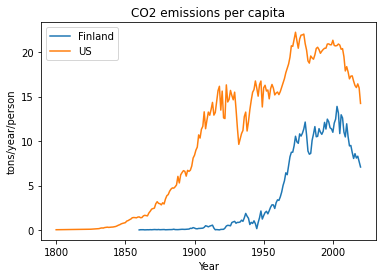

In [5]:
df_fin = df[df.country == "Finland"]
plt.plot(df_fin.year, df_fin.co2_per_capita, label = "Finland")

#for i in df.country.drop_duplicates():print(i)
df_us = df[df.country == "United States"]
plt.plot(df_us.year, df_us.co2_per_capita, label = "US")
plt.ylabel("tons/year/person")
plt.xlabel("Year")
plt.title("CO2 emissions per capita")
plt.legend()


Let's take a look at all countries

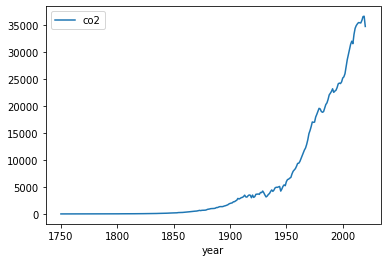

In [6]:
df[df["country"] == "World"].plot(x = "year", y = "co2")

CO2 per capita for each country


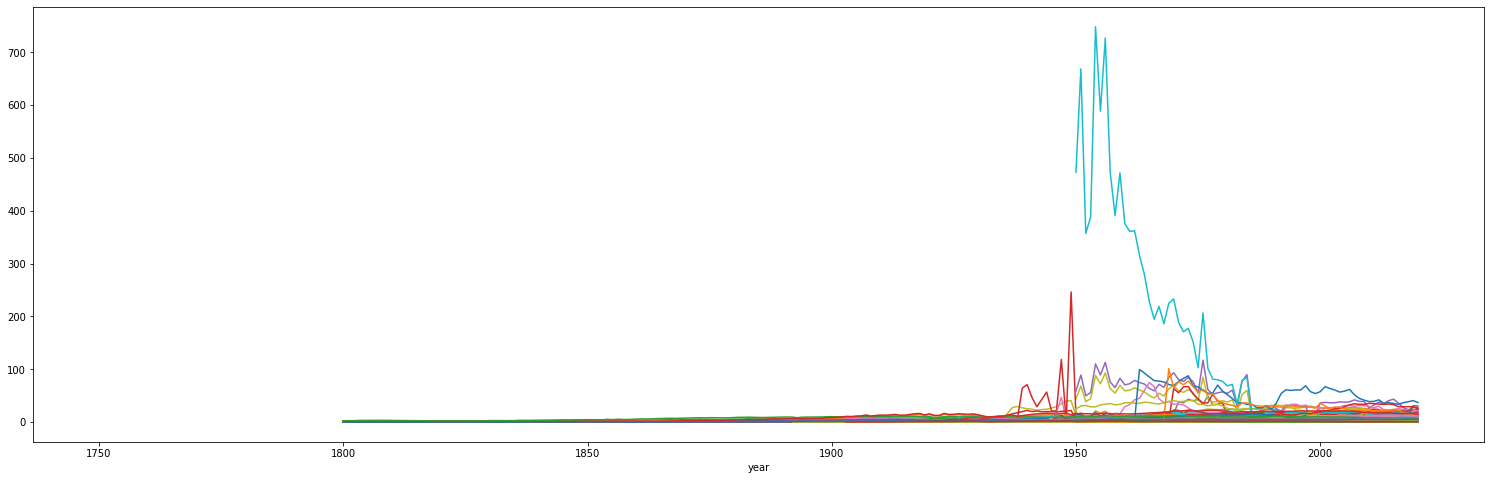

In [7]:
plt.figure(figsize = (26, 8))
dfy = df.set_index("year")
dfy.groupby("country")["co2_per_capita"].plot()
print("CO2 per capita for each country")

There seem to be some outliers. Perhaps oil exporters such as Quatar?

CO2 for each country


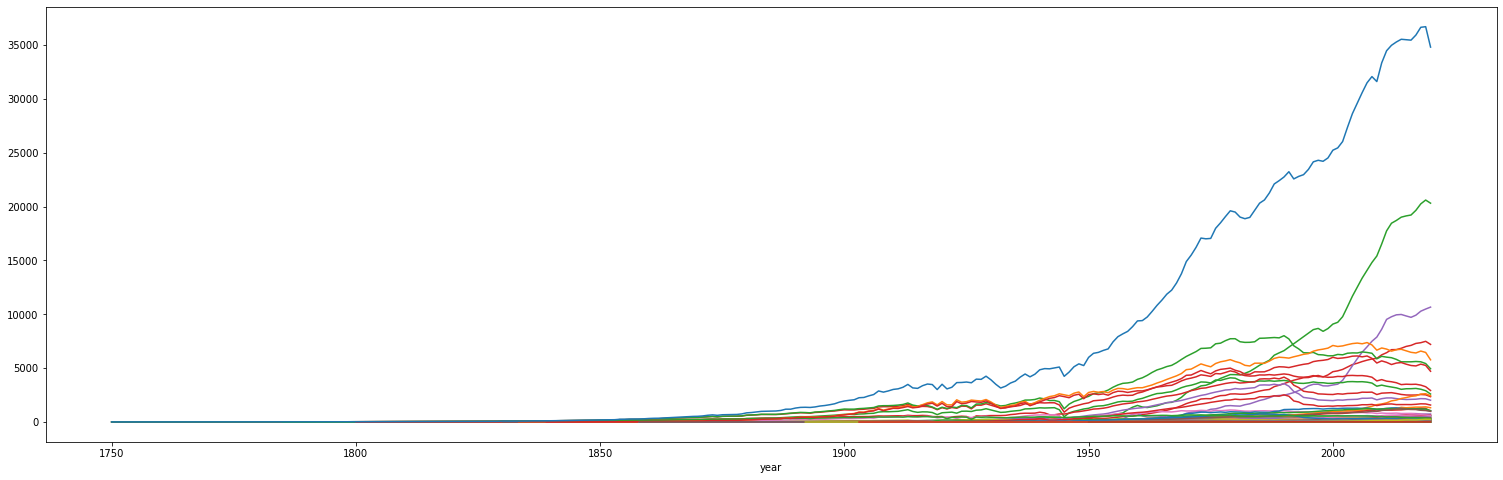

In [8]:
plt.figure(figsize = (26, 8))
dfy.groupby("country")["co2"].plot()
print("CO2 for each country")

Looks like there are some bigh countries (or continents) which keep emitting more and more.

In [9]:
df[["country", "co2", "co2_per_capita", "co2_growth_prct", "year"]][df.year == 2020].sort_values("co2_per_capita", ascending=False).head(20)

,country,co2,co2_per_capita,co2_growth_prct,year
18590,Qatar,106.655,37.019,-7.29,2020
15761,New Caledonia,8.693,30.448,-0.16,2020
14881,Mongolia,88.442,26.978,-0.28,2020
22737,Trinidad and Tobago,35.509,25.373,-12.06,2020
3633,Brunei,10.158,23.220,2.01,2020
12517,Kuwait,88.935,20.825,-7.98,2020
2159,Bahrain,34.960,20.546,1.51,2020
5495,Curacao,3.335,20.323,-11.33,2020
19687,Saudi Arabia,625.508,17.967,0.50,2020
12298,Kazakhstan,291.336,15.516,-1.53,2020


Let's focus on just a few countries that might be interesting to a nordic audience.

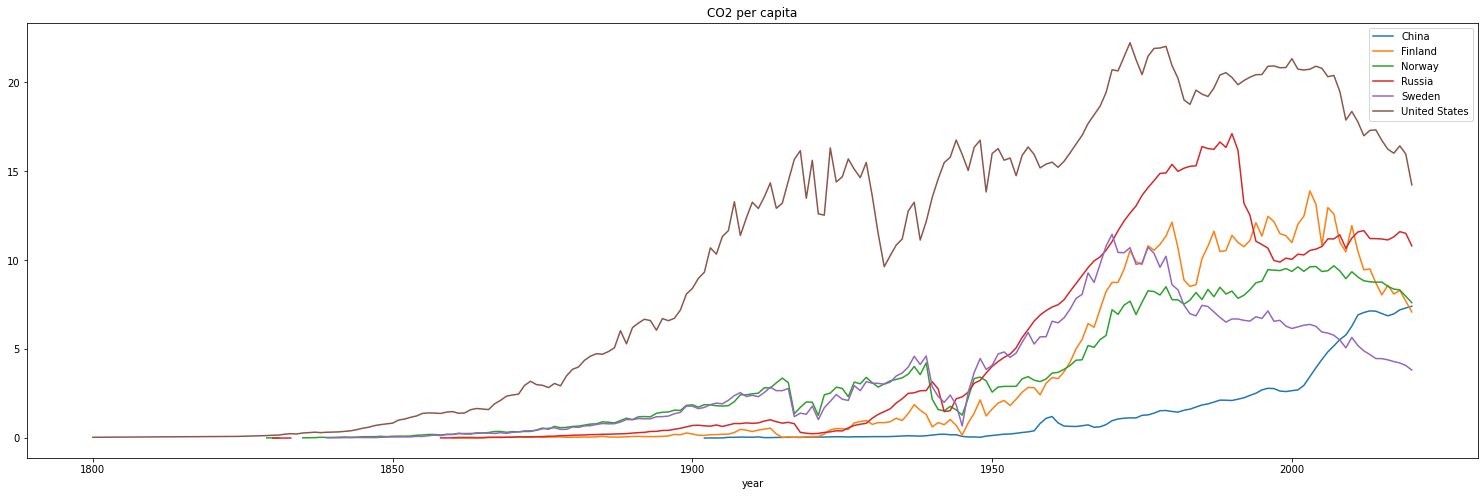

In [10]:
countries_of_interest = ["Finland", "Norway", "Sweden", "United States", "Russia", "China"]
places_of_interest = countries_of_interest + ["World", "Europe", "Asia", "Africa"]

df_of_interest = df[df["country"].isin(countries_of_interest)]

plt.figure(figsize = (26, 8))
dfy_of_interest = df_of_interest.set_index("year")
dfy_of_interest.groupby("country")["co2_per_capita"].plot(legend = True, title = "CO2 per capita")
print("")

Below is an attempt at an interactive visualization which allows the user to find a country they are intrested in and to see it's $CO_2$ emissions.  
I followed this tutorial: https://towardsdatascience.com/using-python-to-create-a-world-map-from-a-list-of-country-names-cd7480d03b10

In [11]:
# !pip install pycountry_convert

In [12]:
# #function to get longitude and latitude data from country code

# from geopy.geocoders import Nominatim

# geolocator = Nominatim()

# def geolocate(country):
#     try:
#         # Geolocate the center of the country
#         loc = geolocator.geocode(country)
#         # And return latitude and longitude
#         return (loc.latitude, loc.longitude)
#     except:
#         # Return missing value
#         return (np.nan, np.nan)


# df_map = df[["year", "country", "co2", "co2_per_capita", "co2_growth_prct", "methane"]]
# df_map = df_map[df_map.year == 2019]

# df_map["geolocation"] = df_map["country"].map(lambda x: geolocate(x))

In [13]:
# # Create a world map to show distributions of users 
# import folium
# from folium.plugins import MarkerCluster

# #empty map
# world_map= folium.Map(tiles="cartodbpositron")
# marker_cluster = MarkerCluster().add_to(world_map)

# #for each coordinate, create circlemarker of desired value
# for i in range(len(df_map)):
#         lat, long = df_map.iloc[i]['geolocation']
#         radius=5
#         popup_text = """Country : {}<br>
#                     CO2 emissions : {}<br>"""
#         popup_text = popup_text.format(df_map.iloc[i]['country'],
#                                    df_map.iloc[i]['co2']
#                                    )
#         if(not np.isnan(lat)):
#           folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)

# #show the map
# world_map

## More overarching stuff

In [14]:
import seaborn as sns

In [15]:
df.columns

Index(['iso_code', 'country', 'year', 'co2', 'consumption_co2',
       'co2_growth_prct', 'co2_growth_abs', 'trade_co2', 'co2_per_capita',
       'consumption_co2_per_capita', 'share_global_co2', 'cumulative_co2',
       'share_global_cumulative_co2', 'co2_per_gdp', 'consumption_co2_per_gdp',
       'co2_per_unit_energy', 'coal_co2', 'cement_co2', 'flaring_co2',
       'gas_co2', 'oil_co2', 'other_industry_co2', 'cement_co2_per_capita',
       'coal_co2_per_capita', 'flaring_co2_per_capita', 'gas_co2_per_capita',
       'oil_co2_per_capita', 'other_co2_per_capita', 'trade_co2_share',
       'share_global_cement_co2', 'share_global_coal_co2',
       'share_global_flaring_co2', 'share_global_gas_co2',
       'share_global_oil_co2', 'share_global_other_co2',
       'cumulative_cement_co2', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_oil_co2',
       'cumulative_other_co2', 'share_global_cumulative_cement_co2',
       'share_global_cumulative_c

In [16]:
df['co2'].describe()

count    23949.000000
mean       267.861942
std       1521.680894
min          0.000000
25%          0.528000
50%          4.857000
75%         42.818000
max      36702.503000
Name: co2, dtype: float64

Correlation matrix for all variables

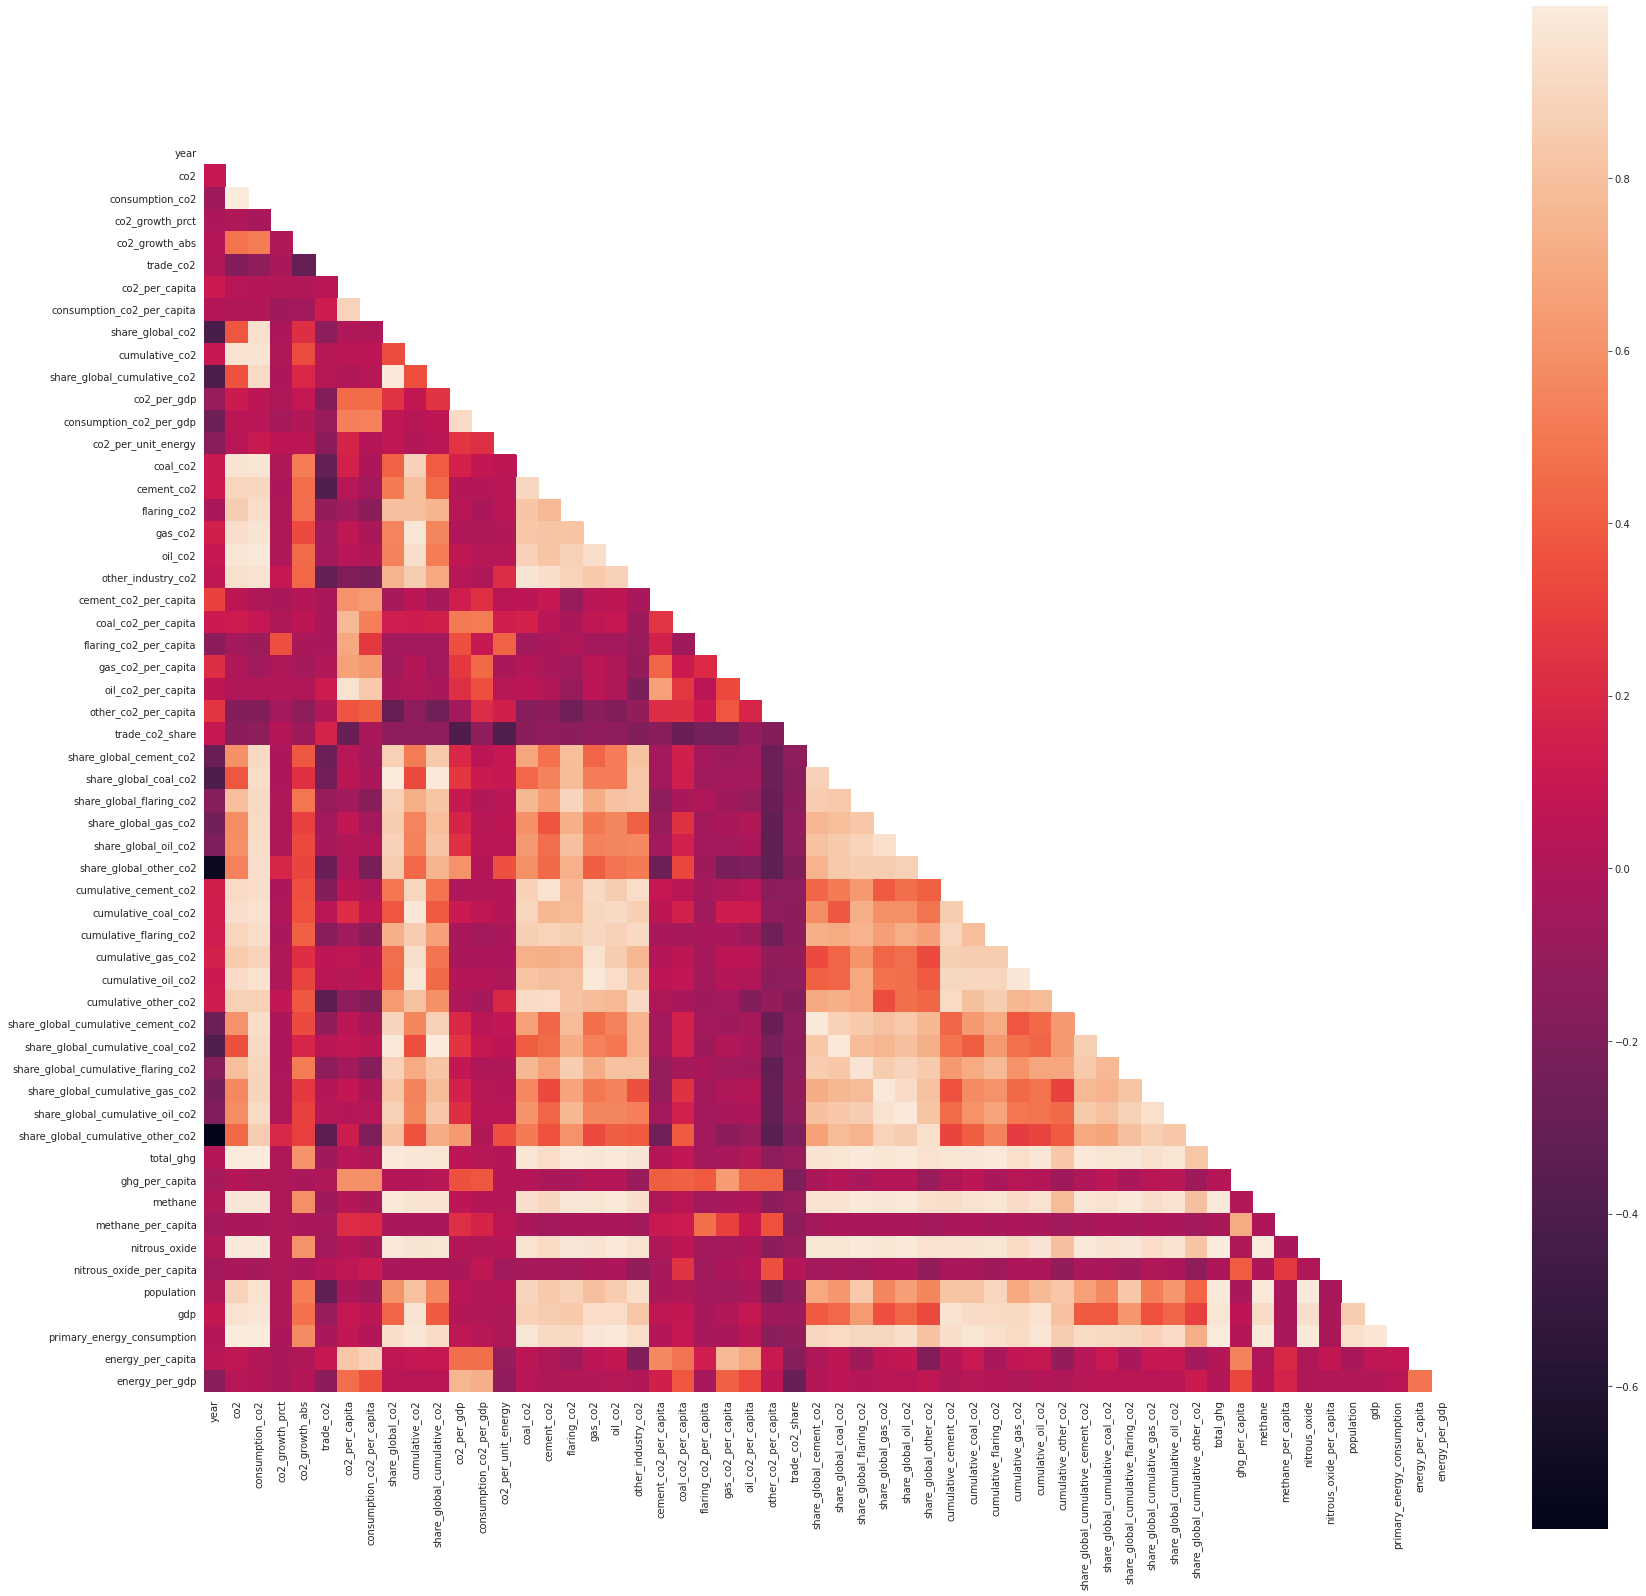

In [17]:
corr = df.corr()
corr = pd.DataFrame(corr)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(28, 28))
    sns.heatmap(corr, mask=mask, square=True);

Highly positively correlated (>- 0.9) variables



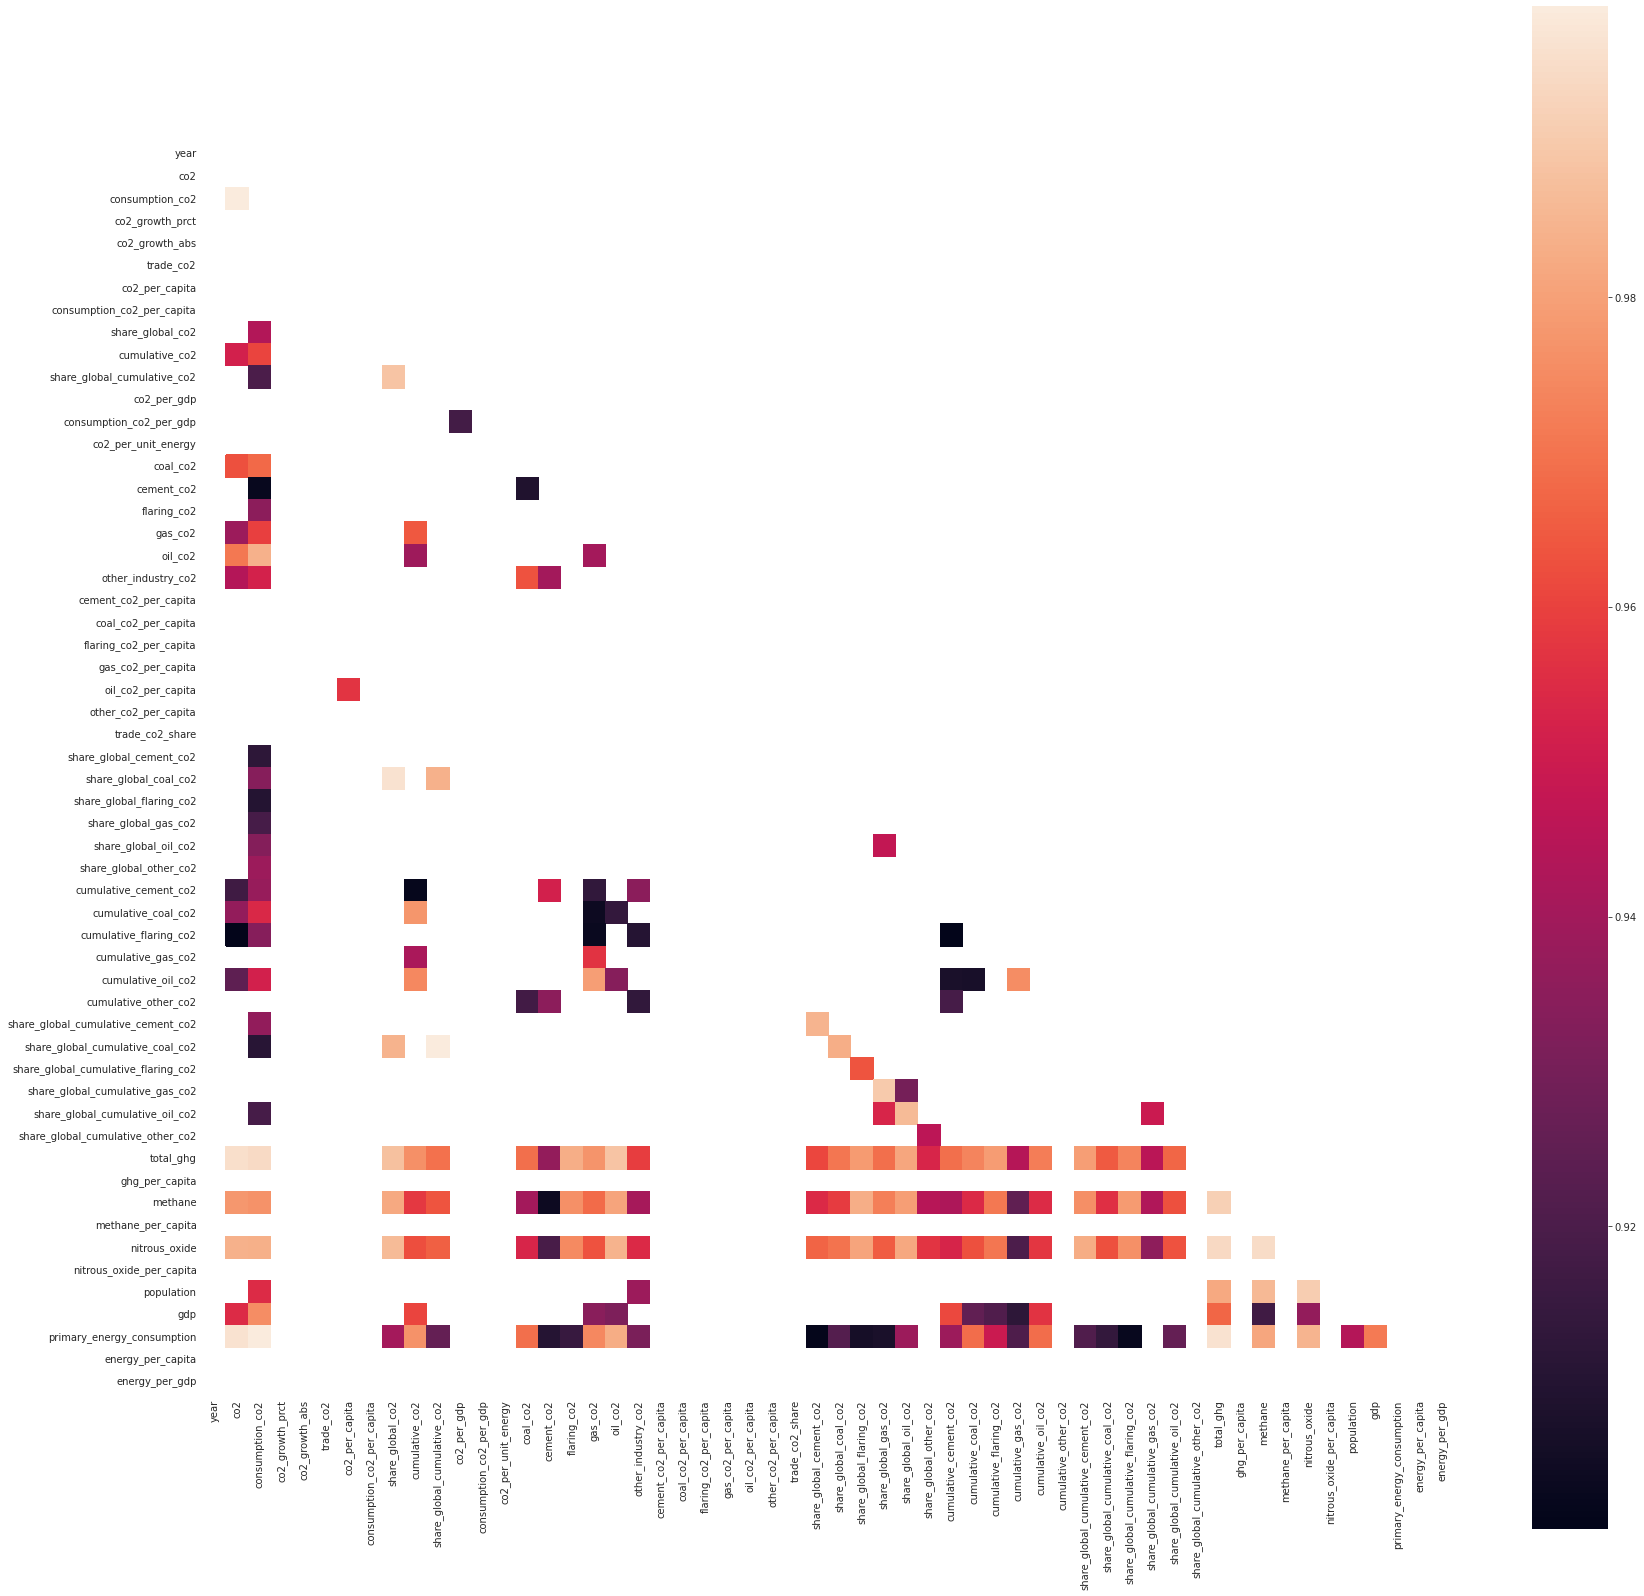

In [18]:
pos = corr[corr >= .9]
mask = np.zeros_like(pos)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(28, 28))
    sns.heatmap(pos, mask=mask, square=True);

Decently negatively correlated (<= -0.3) variables


In [19]:
rows, cols = corr.shape
flds = list(corr.columns)
c = corr.values

for i in range(cols):
    for j in range(i+1, cols):
        if c[i,j] <= -0.3:
            print(flds[i], ' ', flds[j], ' ', c[i,j])

year   share_global_co2   -0.4222763668953728
year   share_global_cumulative_co2   -0.4084631468868427
year   share_global_coal_co2   -0.403803398851633
year   share_global_other_co2   -0.7235569760133104
year   share_global_cumulative_coal_co2   -0.3875414832436975
year   share_global_cumulative_other_co2   -0.7650088032969328
co2_growth_abs   trade_co2   -0.3088530217037383
trade_co2   coal_co2   -0.30850574142177756
trade_co2   cement_co2   -0.3866941279368232
trade_co2   other_industry_co2   -0.3038201759196625
trade_co2   cumulative_other_co2   -0.3428320313038341
trade_co2   share_global_cumulative_other_co2   -0.3399756695839957
trade_co2   population   -0.32837802512400993
share_global_co2   other_co2_per_capita   -0.3026425344818295
co2_per_gdp   trade_co2_share   -0.40415374391902364
co2_per_unit_energy   trade_co2_share   -0.3922614638234143
other_co2_per_capita   share_global_gas_co2   -0.31187321253597966
other_co2_per_capita   share_global_oil_co2   -0.3289236456348296
ot

Top 5 co2 emission outliers wrt mean, median, std, kurt, and skew




In [20]:
continents = ["Asia", "EU-27", "EU-28", "Europe", "North America", 'Asia (excl. China & India)', "International transport", "Europe (excl. EU-27)", "Europe (excl. EU-28)", "Kuwaiti Oil Fires", "World"]
df_country = df[~df["country"].isin(continents)]
df_country['co2']=df_country['co2'].fillna(0)

d = {}
# Group dataframe by country and find countries with highest CO2 emissions
for country, df_country_single in df_country.groupby("country"):
    d[country] = {
        "mean": df_country_single["co2"].mean(),
        "median": df_country_single["co2"].median(),
        "std": df_country_single["co2"].std(),
        "skew": df_country_single["co2"].skew(),
        "kurt": df_country_single["co2"].kurt(),
    }

def print_top_5(d, key):
    print("\n\nTop 5 countries with highest {} Co2 emissions".format(key))
    top_5 = sorted(d.items(), key=lambda x: x[1][key], reverse=True)[:5]
    # return top_5

    for country, value in top_5:
        print(country, value[key])

print_top_5(d, "mean")
print_top_5(d, "median")
print_top_5(d, "std")
print_top_5(d, "skew")
print_top_5(d, "kurt")



Top 5 countries with highest mean Co2 emissions
China 1930.852590163934
United States 1885.6248325791848
Russia 603.8960628272251
Japan 428.9226470588236
Germany 404.52234934497807


Top 5 countries with highest median Co2 emissions
United States 1257.7730000000001
China 459.922
Germany 331.92900000000003
United Kingdom 315.291
South America 140.643


Top 5 countries with highest std Co2 emissions
China 3026.8215171613774
United States 2079.36191456331
Russia 789.0857217617618
India 609.7747362689811
Japan 495.6286506197069


Top 5 countries with highest skew Co2 emissions
Puerto Rico 10.0498756211209
Ryukyu Islands 6.591883798911946
Laos 3.6766875691978
Mongolia 3.3868004813711203
Leeward Islands 3.0313445845976044


Top 5 countries with highest kurt Co2 emissions
Puerto Rico 101.00000000000018
Ryukyu Islands 47.68483694489756
Laos 13.728300202290967
Mongolia 12.974407052859965
Leeward Islands 7.9513422601299


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Could possibly do this process (outliers -> viz) for more variables (per_capita, coal, etc, etc)

## Test out linear regression

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
fi = df[df.country == "Finland"]
fi = fi[df.year > 1980]
fi = fi[df.year < 2019]
fi = fi[["country", "year", "co2", "co2_growth_prct", "population", "gdp", "energy_per_capita"]]
fi["gdp_per_capita"] = fi["gdp"] / fi["population"]
fi.head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,country,year,co2,co2_growth_prct,population,gdp,energy_per_capita,gdp_per_capita
8499,Finland,1981,51.403,-11.59,4809807.0,1.004872e+11,54867.679,20892.157698
8500,Finland,1982,42.976,-16.39,4835102.0,1.037549e+11,53888.911,21458.683774
8501,Finland,1983,41.463,-3.52,4862171.0,1.065554e+11,53040.244,21915.187666


[-1.39014240e-05 -2.70751825e-04  1.52089123e-03]
36.436696772595425


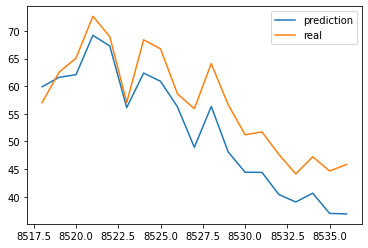

In [23]:
predict_from = 2000
training = fi[fi.year < predict_from]
test = fi[fi.year >= predict_from].copy()
y = training.co2
X = training[["population", "gdp_per_capita", "energy_per_capita"]]

reg = LinearRegression().fit(X, y)

print(reg.coef_)
print(reg.intercept_)

prediction = reg.predict(test[["population", "gdp_per_capita", "energy_per_capita"]])
real = test.co2

result = pd.DataFrame({"year": test.year, "prediction": prediction, "real":real})

result[["prediction", "real"]].plot()


# Testing a simpler univariate model

[0.98145088]
-1898.8498771929817


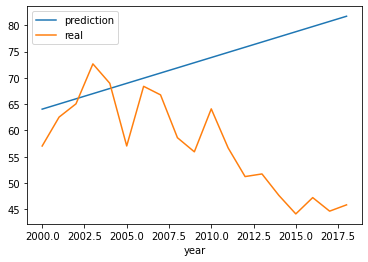

In [24]:
X = training.year.values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)

print(reg.coef_)
print(reg.intercept_)

prediction = reg.predict(test.year.values.reshape(-1, 1))
real = test.co2

result_simple = pd.DataFrame({"year": test.year, "prediction": prediction, "real":real})

result_simple.plot(x = "year")

# Testing out Facebook Prophet

In [25]:
import fbprophet

train_data = training[["year", "co2"]].copy()
train_data["year"] = pd.to_datetime(train_data["year"], format="%Y")
train_data.columns = ["ds","y"]

test_data = pd.DataFrame(pd.to_datetime(test["year"], format= "%Y"))
test_data.columns = ["ds"]


model = fbprophet.Prophet()
model.fit(train_data)

forecast = model.predict(test_data)

forecast.head(3)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 14.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2000-01-01,23.356131,58.448012,67.400588,23.356131,23.356131,39.524106,39.524106,39.524106,39.524106,39.524106,39.524106,0.0,0.0,0.0,62.880237
1,2001-01-01,24.356439,62.007860,70.745089,24.356439,24.356439,42.137712,42.137712,42.137712,42.137712,42.137712,42.137712,0.0,0.0,0.0,66.494151
2,2002-01-01,25.354014,62.386403,71.192294,25.354014,25.354014,41.191332,41.191332,41.191332,41.191332,41.191332,41.191332,0.0,0.0,0.0,66.545346


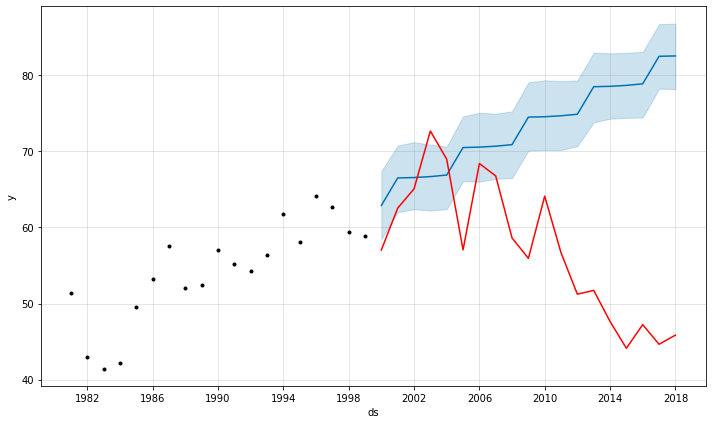

In [26]:
fig = model.plot(forecast)
plt.plot( test_data.ds, test["co2"], c="red")

# Comparing different methods

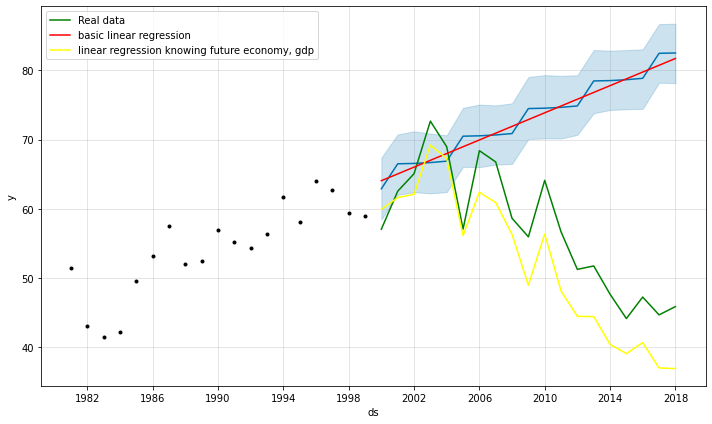

In [27]:
model.plot(forecast)
plt.plot(test_data.ds, test["co2"], c="green", label = "Real data")
plt.plot(pd.to_datetime(result_simple.year, format="%Y"), result_simple.prediction, c = "red", label = "basic linear regression")
plt.plot(pd.to_datetime(result.year, format="%Y"), result.prediction, c = "yellow", label = "linear regression knowing future economy, gdp")
plt.legend()

# Calculating the uncertainty in linear regression
There are two sources of uncertainty:
* (Epistemic) Systematic error of measurement/estimation in our data (about 5%)
* (Aleatoric) Uncertainty in the "true" values due to random events happening that affect the GHG output.

Linear regression calculations come from https://science.widener.edu/svb/stats/regress.html

In [28]:
cov_mat = training[["year", "co2"]].cov()
s_xy = cov_mat["year"]["co2"]  * (len(y) - 1)
s_xx = cov_mat["year"]["year"] * (len(y) - 1)  # Varience but without dividing by the number of samples
s_yy = cov_mat["co2"]["co2"]   * (len(y) - 1)
y_mean = training["co2"].mean()
x_mean = training["year"].mean()

m = s_xy / s_xx   # slope
b = y_mean - (m * x_mean)

print("m: " + str(m) + ", b: " + str(b))

s_r = np.sqrt( (s_yy - (m*m*s_xx)) / (len(y) - 2))

# Uncertainty in y as a function of x
def s_y(x):
  s_y = s_r * np.sqrt(1 + 1/len(y) + (x - x_mean) ** 2 / s_xx)
  return(s_y)


m: 0.9814508771929823, b: -1898.8498771929821


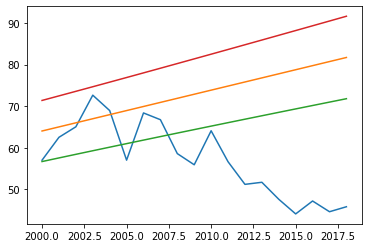

In [29]:
add_5_percent_uncertainty = True   # Select True or False

multipliers = {"lFalse": 1, "uFalse": 1, "lTrue": 0.95, "uTrue": 1.05}
lower_multiplier = multipliers["l" + str(add_5_percent_uncertainty)]
upper_multiplier = multipliers["u" + str(add_5_percent_uncertainty)]


test["co2_hat"] = m * test["year"] + b
test["co2_hat_lower"] = test["co2_hat"] * lower_multiplier - s_y(test.year)
test["co2_hat_upper"] = test["co2_hat"] * upper_multiplier + s_y(test.year)

plt.plot(test.year, test.co2)
plt.plot(test.year, test.co2_hat)
plt.plot(test.year, test.co2_hat_lower)
plt.plot(test.year, test.co2_hat_upper)


# Compare the uncertainty to prophet

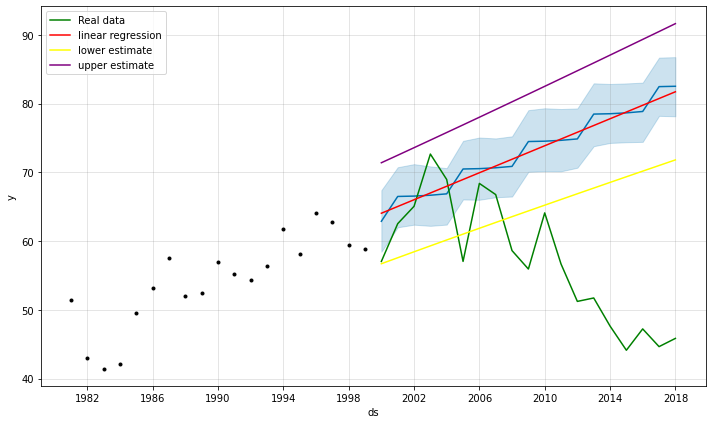

In [30]:
model.plot(forecast)
plt.plot(test_data.ds, test["co2"], c="green", label = "Real data")
plt.plot(pd.to_datetime(result_simple.year, format="%Y"), test.co2_hat, c = "red", label = "linear regression")
plt.plot(pd.to_datetime(result.year, format="%Y"), test.co2_hat_lower, c = "yellow", label = "lower estimate")
plt.plot(pd.to_datetime(result.year, format="%Y"), test.co2_hat_upper, c = "purple", label = "upper estimate")

plt.legend()

## Test out predictions using data from years before

In [31]:
shift_by = 5
fi["co2_future"] = fi["co2"].shift(-shift_by)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


[ 1.63069285e-04  5.81744523e-04  9.99693991e-04 -3.40915276e+00
 -4.20901285e-01 -1.13730045e-01]
5973.53889207735


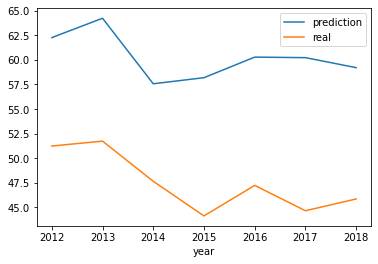

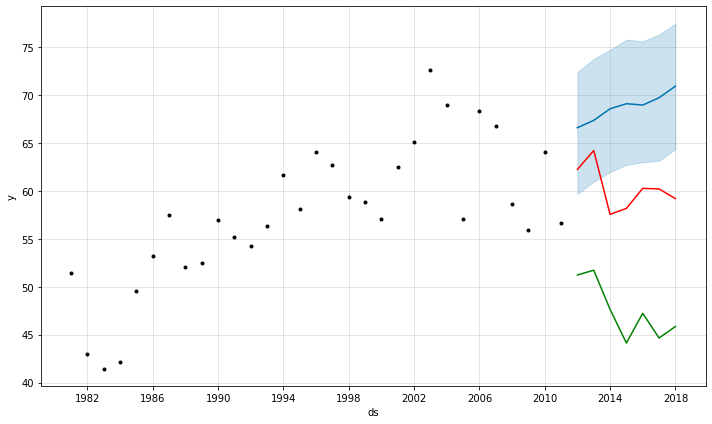

In [32]:
predict_from = 2012
training = fi[fi.year < predict_from]
test = fi[fi.year >= predict_from].copy()
y = training.co2
X = training[["population", "gdp_per_capita", "energy_per_capita"]]

import fbprophet

train_data = training[["year", "co2"]].copy()
train_data["year"] = pd.to_datetime(train_data["year"], format="%Y")
train_data.columns = ["ds","y"]

test_data = pd.DataFrame(pd.to_datetime(test["year"], format= "%Y"))
test_data.columns = ["ds"]


model = fbprophet.Prophet()
model.fit(train_data)

forecast = model.predict(test_data)




training2 = fi[fi.year < predict_from - shift_by].copy()
test2 = fi[fi.year >= predict_from - shift_by].copy()
y = training2.co2_future
X = training2[["population", "gdp_per_capita", "energy_per_capita", "year", "co2", "co2_growth_prct"]]

reg = LinearRegression().fit(X, y)

print(reg.coef_)
print(reg.intercept_)

prediction = reg.predict(test2[["population", "gdp_per_capita", "energy_per_capita", "year", "co2", "co2_growth_prct"]])[:len(test2) - shift_by]
real = test2.co2_future[:len(test2) - shift_by]

result = pd.DataFrame({"year": test2.year[:len(test2) - shift_by] + shift_by, "prediction": prediction, "real":real})

result.plot(x = "year", y = ["prediction", "real"])

fig = model.plot(forecast)
plt.plot( test_data.ds, test["co2"], c="green")
plt.plot( test_data.ds, prediction, c = "red")

In [33]:
test_data.ds.tail(14)

8530   2012-01-01
8531   2013-01-01
8532   2014-01-01
8533   2015-01-01
8534   2016-01-01
8535   2017-01-01
8536   2018-01-01
Name: ds, dtype: datetime64[ns]

In [34]:
# Trend Analysis
fi = df[df.country == "Sweden"]
fi = fi[df.year > 1980]
fi = fi[df.year < 2019]
fi = fi[["country", "year", "co2", "co2_growth_prct", "population", "gdp", "energy_per_capita"]]
fi["gdp_per_capita"] = fi["gdp"] / fi["population"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [35]:
predict_from = 2000
offset_here = 2
training = fi[fi.year < predict_from] # Offset = 2
test = fi[fi.year >= predict_from].copy()
y_train = training.co2
X_train = training[["energy_per_capita"]] # This has a direct correlation. The others (population and gdp) not so much.
y_test = test.co2
X_test = test[["energy_per_capita"]]

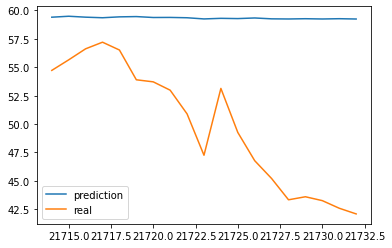

In [36]:
reg = LinearRegression().fit(X_train, y_train)
prediction = reg.predict(X_test)

result = pd.DataFrame({"year": test.year, "prediction": prediction, "real":y_test})
result[["prediction", "real"]].plot()

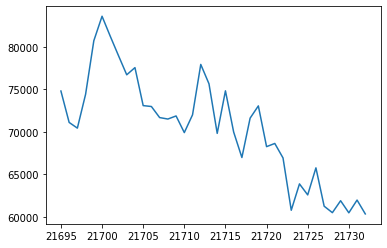

In [37]:
fi.energy_per_capita.plot()

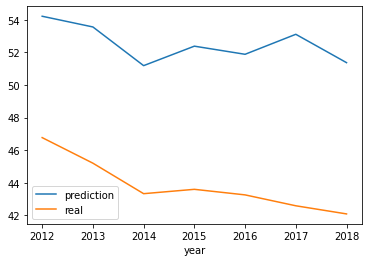

In [38]:
shift_by = 5
fi["co2_future"] = fi["co2"].shift(-shift_by)

predict_from = 2012


training = fi[fi.year < predict_from - shift_by].copy()
test = fi[fi.year >= predict_from - shift_by].copy()
X = training[["energy_per_capita", "year"]]
y_train = training.co2_future
X_train = training[["energy_per_capita"]] # This has a direct correlation. The others (population and gdp) not so much.
y_test = test.co2_future[:len(test2) - shift_by]
X_test = test[["energy_per_capita"]]

reg = LinearRegression().fit(X_train, y_train)

prediction = reg.predict(X_test)[:len(X_test) - shift_by]

result = pd.DataFrame({"year": test.year[:len(test) - shift_by] + shift_by, "prediction": prediction, "real":y_test})

result.plot(x = "year", y = ["prediction", "real"])


# Final prediction

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                co2_now   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     100.3
Date:                Wed, 08 Dec 2021   Prob (F-statistic):           6.49e-10
Time:                        19:13:31   Log-Likelihood:                -64.954
No. Observations:                  19   AIC:                             141.9
Df Residuals:                      13   BIC:                             147.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
year                  1.2885      0.09

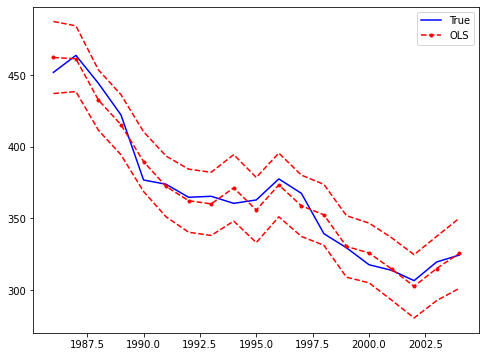

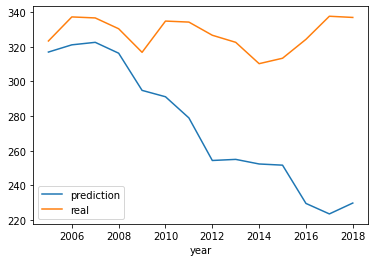

In [39]:
import statsmodels.api as sm

shift_by = 5

fi = df[df.country == "Poland"]
fi = fi[df.year > 1980]
fi = fi[df.year < 2019]
fi = fi[["country", "year", "co2", "co2_growth_prct", "population", "gdp", "energy_per_capita"]]
fi["gdp_per_capita"] = fi["gdp"] / fi["population"]
fi["co2_now"] = fi["co2"].shift(-shift_by) # All other variables are from the past
fi["year"] = fi.year.shift(-shift_by)


predict_from = 2005


training = fi[fi.year < predict_from].copy()
test = fi[fi.year >= predict_from].copy()

y_train = training.co2_now
X_train = training[["year", "co2", "co2_growth_prct", "population", "gdp", "energy_per_capita"]]
y_test = test.co2_now
X_test = test[["year", "co2", "co2_growth_prct", "population", "gdp", "energy_per_capita"]]

reg = LinearRegression().fit(X_train, y_train)

prediction = reg.predict(X_test)

y = y_train
x = X_train
res = sm.OLS(y, x).fit()
print(res.summary())

pred_ols = res.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]

fig, ax = plt.subplots(figsize=(8, 6))

#ax.plot(x, y, "o", label="data")
ax.plot(X_train.year, y_train, "b-", label="True")
ax.plot(X_train.year, res.fittedvalues, "r--.", label="OLS")
ax.plot(X_train.year, iv_u, "r--")
ax.plot(X_train.year, iv_l, "r--")
ax.legend(loc="best")



result = pd.DataFrame({"year": test.year, "prediction": prediction, "real":y_test})

result.plot(x = "year", y = ["prediction", "real"])

print("intercept" + str(reg.intercept_))
print("coefficient" + str(reg.coef_))


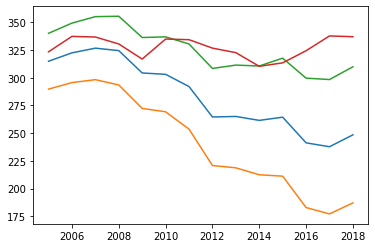

In [40]:
import statsmodels.api as sm
import statsmodels



# include constant in ols models, which is not done by default
#x = sm.add_constant(X_train)
y = y_train
x = X_train

model = sm.OLS(y,x)
results = model.fit()

a, b ,c = statsmodels.sandbox.regression.predstd.wls_prediction_std(results, X_test)

plt.plot(X_test.year, results.predict(X_test))
plt.plot(X_test.year,b)
plt.plot(X_test.year, c)
plt.plot(X_test.year, y_test)


In [41]:
country = "Poland"
predict_time = 5
train_from = 1970

fi = df[df.country == country]
fi = fi[["country", "year", "co2", "co2_growth_prct", "population", "energy_per_capita"]]
fi = fi[df.year > train_from]
available_data_year = fi[~ fi.isnull().any(axis = 1)].year.max()
years_cut_off = fi.year.max() - available_data_year
shift_by = predict_time + years_cut_off
fi["co2_now"] = fi["co2"].shift(-shift_by) # All other variables are from the past
fi = fi[df.year < available_data_year]


predict_from = available_data_year + 1

training = fi[fi.year < predict_from - shift_by].copy()
test = fi[fi.year >= predict_from - shift_by].copy()

y_train = training.co2_now
X_train = training[["year", "co2", "co2_growth_prct", "population", "energy_per_capita"]]
X_test = test[["year", "co2", "co2_growth_prct", "population", "energy_per_capita"]]

reg = LinearRegression(fit_intercept = False).fit(X_train, y_train)
prediction = reg.predict(X_test)
result = pd.DataFrame({"year": test.year + shift_by, "prediction": prediction})

print(reg.coef_)
result

[ 6.84817317e-01  5.44365104e-01 -2.72054167e+00 -3.05617677e-05
 -1.96593047e-03]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


,year,prediction
18260,2020,337.980136
18261,2021,328.300825
18262,2022,326.999444
18263,2023,331.911262
18264,2024,343.882670


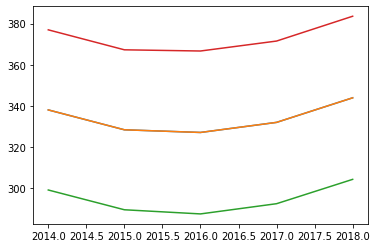

In [42]:
import statsmodels.api as smapi
import statsmodels as sm


# include constant in ols models, which is not done by default
#x = sm.add_constant(X_train)
y = y_train
x = X_train

model = smapi.OLS(y,x)
results = model.fit()

a, b ,c = statsmodels.sandbox.regression.predstd.wls_prediction_std(results, X_test)

plt.plot(X_test.year, results.predict(X_test))
plt.plot(X_test.year, result.prediction)
plt.plot(X_test.year,b)
plt.plot(X_test.year, c)
#result.plot(x = "year", y = "prediction")


## Model used in production

In [251]:
# !pip install plotly==5.3.1

import plotly.express as px
import plotly.graph_objs as go


url = 'http://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv'
df = pd.read_csv(url)

def get_OWID_data():
  #url = 'http://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv'
  #df = pd.read_csv(url)
  #df = pd.read_csv("owid-co2-data_25_11_2021.csv")
  return(df)

def model_future_CO2_emissions(country, predict_time, train_from):
  df = get_OWID_data()
  df_country = df[df.country == country]
  fi = df_country[["country", "year", "co2", "population", "energy_per_capita"]]
  fi = fi[df.year > train_from]
  available_data_year     = fi[~ fi.isnull().any(axis = 1)    ].year.max()
  available_co2_data_year = fi[~ fi.co2.isnull()].year.max()
  years_cut_off = available_co2_data_year - available_data_year
  shift_by = predict_time + years_cut_off
  fi["co2_now"] = fi["co2"].shift(-shift_by) # All other variables are from the past
  fi = fi[df.year <= available_data_year]
  predict_from = available_co2_data_year + 1

  training = fi[fi.year < predict_from - shift_by].copy()
  test = fi[fi.year >= predict_from - shift_by].copy()

  y_train = training.co2_now
  X_train = training[["year", "population", "energy_per_capita"]]
  X_test = test[["year", "population", "energy_per_capita"]]

  model = smapi.OLS(y_train,X_train)
  results = model.fit()

  # The last recorded value will be prepended so that there are no gaps in the plot
  last_recorded_value = pd.Series([df_country[df_country.year == available_co2_data_year].co2.values[0]])
  prediction = results.predict(X_test)
  prediction = pd.concat([last_recorded_value.copy(), prediction]).reset_index(drop = True)
  prediction_years = test.year + shift_by
  prediction_years = pd.concat([pd.Series([available_co2_data_year]), prediction_years]).reset_index(drop = True)

  # https://tedboy.github.io/statsmodels_doc/generated/statsmodels.sandbox.regression.predstd.wls_prediction_std.html
  a, lower_confidence ,upper_confidence = sm.sandbox.regression.predstd.wls_prediction_std(results, X_test)
  lower_confidence = pd.concat([last_recorded_value.copy(), pd.Series(lower_confidence)]).reset_index(drop = True)
  upper_confidence = pd.concat([last_recorded_value.copy(), pd.Series(upper_confidence)]).reset_index(drop = True)
  result = pd.DataFrame({"year": prediction_years, "prediction": prediction, "lci": lower_confidence, "uci": upper_confidence})

  return(result)



def model_future_methane_emissions(country, predict_time, train_from):
  df = get_OWID_data()
  fi = df[df.country == country]
  fi = fi[["country", "year", "co2", "population", "methane"]]
  fi = fi[df.year > train_from]
  available_data_year = fi[~ fi.isnull().any(axis = 1)].year.max()
  available_methane_data_year = fi[~ fi.methane.isnull()].year.max()
  if(pd.isnull(available_data_year)):
    return(pd.DataFrame({"year":[], "methane prediction": [], "muci": [], "mlci":[]}))
  years_cut_off = available_methane_data_year - available_data_year
  shift_by = predict_time + years_cut_off
  fi["methane_now"] = fi["methane"].shift(-shift_by) # All other variables are from the past
  fi = fi[df.year <= available_data_year]
  predict_from = available_methane_data_year + 1  

  training = fi[fi.year < predict_from - shift_by].copy()
  test = fi[fi.year >= predict_from - shift_by].copy()

  y_train = training.methane_now
  X_train = training[["population"]]
  X_test = test[["population"]]

  model = smapi.OLS(y_train,X_train)
  results = model.fit()

  a, lower_confidence ,upper_confidence = sm.sandbox.regression.predstd.wls_prediction_std(results, X_test)
  result = pd.DataFrame({"year": test.year + shift_by, "methane prediction": results.predict(X_test), "mlci": lower_confidence, "muci": upper_confidence})
  return(result)


def emissions_history_plot(country, from_year):
  co2_prediction = model_future_CO2_emissions(country, 5, 1980)
  methane_prediction = model_future_methane_emissions(country, 5, 2000)
  df = get_OWID_data()
  dfw = df[df["country"] == country]
  df3 = dfw[dfw.year >= from_year].copy()
  df3 = pd.merge(df3, co2_prediction, how = "outer", on=["year"])
  df3 = pd.merge(df3, methane_prediction, how = "outer", on=["year"])
  df3.rename({"co2": "CO2", "prediction": "CO2 prediction"}, axis = 1, inplace = True)

  fig = px.line(
    df3, 
    x = "year", 
    y = ["CO2", "CO2 prediction", "methane", "methane prediction"],
    labels = {"value": "million tonnes (Mt) of CO2 equivalent", "variable": "Greenhouse gas"},
    title = "CO2 and methane emissions history for " + str(country),
    width = 900,
    height = 500
  )
  fig.add_hline(y = 0, line_color = "black", line_dash = "dash")
  fig.add_annotation( # add a text callout with arrow
    text="Paris agreement", x=2016, y=1.05 * int(df3[df3.year == 2016].CO2), arrowhead=1, showarrow=True
  )
  fig.add_annotation( # add a text callout with arrow
    text="Kyoto protocol", x=2005, y=1.05 * int(df3[df3.year == 2005].CO2), arrowhead=1, showarrow=True
  )
  fig.add_annotation( # add a text callout with arrow
    text="WW1", x=1914, y=1.3 * int(df3[df3.year == 1914].CO2), arrowhead=1, showarrow=True
  )
  fig.add_annotation( # add a text callout with arrow
    text="WW2", x=1939, y=1.3 * int(df3[df3.year == 1939].CO2), arrowhead=1,  showarrow=True
  )
  fig.add_annotation( # add a text callout with arrow
    text="Early 1980's recession", x=1980, y=1.05 * int(df3[df3.year == 1980].CO2), arrowhead=1,  showarrow=True, ay = -50
  )
  fig.add_annotation( # add a text callout with arrow
    text="The Great Depession", x=1930, y=1.3 * int(df3[df3.year == 1930].CO2), arrowhead=1,  showarrow=True, ay = -100
  )
  fig.add_annotation( # add a text callout with arrow
    text="COVID pandemic", x=2019, y=0.99 * int(df3[df3.year == 2019].CO2), arrowhead=1,  showarrow=True, ay = 70
  )

  # Confidence intervals
  fig.add_trace(go.Scatter(x=df3.year, y = df3.uci,
    fill=None,
    mode='lines',
    line_color="rgba(255, 0, 0, 0)",
    name = ""
  ))
  fig.add_trace(go.Scatter(
    x=df3.year, y = df3.lci,
    fill='tonexty', # fill area between trace0 and trace1
    mode='lines', line_color="rgba(255, 0, 0, 0)", fillcolor="rgba(255, 0, 0, 0.2)",
    name = "95% confidence inteval for CO2"
  ))
  fig.add_trace(go.Scatter(x=df3.year, y = df3.muci,
    fill=None,
    mode='lines',
    line_color="rgba(0, 255, 0, 0)",
    name = ""
  ))
  fig.add_trace(go.Scatter(
    x=df3.year, y = df3.mlci,
    fill='tonexty', # fill area between trace0 and trace1
    mode='lines', line_color="rgba(0, 255, 0, 0)", fillcolor = "rgba(0, 255, 0, 0.2)",
    name = "95% confidence inteval for methane"
  ))

  return(fig)

In [252]:
country = "Finland"
from_year = 1900

co2_prediction = model_future_CO2_emissions(country, 5, 1980)
methane_prediction = model_future_methane_emissions(country, 5, 2000)
df = get_OWID_data()
dfw = df[df["country"] == country]
df3 = dfw[dfw.year >= from_year].copy()
df3 = pd.merge(df3, co2_prediction, how = "outer", on=["year"])
df3 = pd.merge(df3, methane_prediction, how = "outer", on=["year"])
df3.rename({"co2": "CO2", "prediction": "CO2 prediction"}, axis = 1, inplace = True)



fig = px.line(
  df3, 
  x = "year", 
  y = ["CO2", "CO2 prediction", "methane", "methane prediction"],
  labels = {"value": "million tonnes (Mt) of CO2 equivalent", "variable": "Greenhouse gas"},
  title = "CO2 and methane emissions history for " + str(country),
  width = 900,
  height = 500
)


# Confidence intervals
fig.add_trace(go.Scatter(x=df3.year, y = df3.uci,
  fill=None,
  mode='lines',
  line_color="rgba(255, 0, 0, 0)",
  name = ""
))
fig.add_trace(go.Scatter(
  x=df3.year, y = df3.lci,
  fill='tonexty', # fill area between trace0 and trace1
  mode='lines', line_color="rgba(255, 0, 0, 0)", fillcolor="rgba(255, 0, 0, 0.2)",
  name = "95% confidence inteval for CO2"
))
fig.add_trace(go.Scatter(x=df3.year, y = df3.muci,
  fill=None,
  mode='lines',
  line_color="rgba(0, 255, 0, 0)",
  name = ""
))
fig.add_trace(go.Scatter(
  x=df3.year, y = df3.mlci,
  fill='tonexty', # fill area between trace0 and trace1
  mode='lines', line_color="rgba(0, 255, 0, 0)", fillcolor = "rgba(0, 255, 0, 0.2)",
  name = "95% confidence inteval for methane"
))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:68: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [253]:
def model_future_CO2_emissions_accuracy(country, predict_time, train_from, predict_from_year):
  df = get_OWID_data()
  df_country = df[df.country == country]
  df_country2 = df_country[df_country.year < predict_from_year]
  fi = df_country2[["country", "year", "co2", "population", "energy_per_capita"]]
  fi = fi[df.year > train_from]
  available_data_year     = fi[~ fi.isnull().any(axis = 1)    ].year.max()
  available_co2_data_year = fi[~ fi.co2.isnull()].year.max()
  years_cut_off = available_co2_data_year - available_data_year
  shift_by = predict_time + years_cut_off
  fi["co2_now"] = fi["co2"].shift(-shift_by) # All other variables are from the past
  fi = fi[df.year <= available_data_year]
  predict_from = available_co2_data_year + 1


  training = fi[fi.year < predict_from - shift_by].copy()
  test = fi[fi.year >= predict_from - shift_by].copy()


  y_train = training.co2_now
  X_train = training[["year", "population", "energy_per_capita"]]
  X_test = test[["year", "population", "energy_per_capita"]]

  model = smapi.OLS(y_train,X_train)
  results = model.fit()

  prediction = results.predict(X_test)
  prediction_years = test.year + shift_by

  # https://tedboy.github.io/statsmodels_doc/generated/statsmodels.sandbox.regression.predstd.wls_prediction_std.html
  a, lower_confidence ,upper_confidence = sm.sandbox.regression.predstd.wls_prediction_std(results, X_test)
  result = pd.DataFrame({"year": prediction_years, "prediction": prediction, "lci": lower_confidence, "uci": upper_confidence})

  y_test = df_country[df_country.year.isin(prediction_years)]
  y_test = y_test[["year", "co2"]]
  result = pd.merge(result, y_test, how = "inner", on=["year"])
  result["pae"] = (result.prediction - result.co2).abs() / result.co2 * 100

  return(result)


def model_future_methane_emissions_accuracy(country, predict_time, train_from, predict_from_year):
  df = get_OWID_data()
  fi1 = df[df.country == country]
  fi = fi1[fi1.year < predict_from_year]
  fi = fi[["country", "year", "co2", "population", "methane"]]
  fi = fi[df.year > train_from]
  available_data_year = fi[~ fi.isnull().any(axis = 1)].year.max()
  available_methane_data_year = fi[~ fi.methane.isnull()].year.max()
  if(pd.isnull(available_data_year)):
    return(pd.DataFrame({"year":[], "methane prediction": [], "muci": [], "mlci":[]}))
  years_cut_off = available_methane_data_year - available_data_year
  shift_by = predict_time + years_cut_off
  fi["methane_now"] = fi["methane"].shift(-shift_by) # All other variables are from the past
  fi = fi[df.year <= available_data_year]
  predict_from = available_methane_data_year + 1  

  training = fi[fi.year < predict_from - shift_by].copy()
  test = fi[fi.year >= predict_from - shift_by].copy()

  y_train = training.methane_now
  X_train = training[["population", "year"]]
  X_test = test[["population", "year"]]

  model = smapi.OLS(y_train,X_train)
  results = model.fit()

  a, lower_confidence ,upper_confidence = sm.sandbox.regression.predstd.wls_prediction_std(results, X_test)
  result = pd.DataFrame({"year": test.year + shift_by, "methane prediction": results.predict(X_test), "mlci": lower_confidence, "muci": upper_confidence})

  y_test = fi1[fi1.year.isin(result.year)]
  y_test = y_test[["year", "methane"]]
  result = pd.merge(result, y_test, how = "inner", on=["year"])
  result["m_pae"] = (result["methane prediction"]- result.methane).abs() / result.methane * 100

  return(result)


In [244]:
#model_future_CO2_emissions_accuracy("Finland", 5, 1980, 2019)
#model_future_methane_emissions_accuracy("Finland", 5, 1990, 2018)
#model_future_methane_emissions("Finland", 5, 1990)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,year,prediction,lci,uci,co2,pae
0,2019,40.128738,27.323099,52.934377,42.546,5.681526
1,2020,38.716374,25.627032,51.805717,39.288,1.454963


In [254]:
import warnings


countries = ["World", "Europe", "Finland", "Sweden", "Norway", "China", "United States"]
predict_for = 5
train_from = 1980
predict_from = range(2000, 2016, 1)

l0 = []
l1 = []
l2 = []
l3 = []
l4 = []

print("CO2")

for p in predict_from:
  for c in countries:
    with warnings.catch_warnings(record=True):
      res = model_future_CO2_emissions_accuracy(c, predict_for, train_from, p).pae
    l0.append(res[0])
    l1.append(res[1])
    l2.append(res[2])
    l3.append(res[3])
    l4.append(res[4])



# similar for methane

countries = ["World", "Finland", "Sweden", "Norway", "China", "United States"]
predict_for = 5
train_from = 1990
predict_from = range(2005, 2013, 1)


m0 = []
m1 = []
m2 = []
m3 = []
m4 = []

print("Methane")
for p in predict_from:
  for c in countries:
    with warnings.catch_warnings(record=True):
      res = model_future_methane_emissions_accuracy(c, predict_for, train_from, p).m_pae
    m0.append(res[0])
    m1.append(res[1])
    m2.append(res[2])
    m3.append(res[3])
    m4.append(res[4])

print("done")

CO2
Methane
done


In [255]:
print("CO2")
print(np.average(l0))
print(np.average(l1))
print(np.average(l2))
print(np.average(l3))
print(np.average(l4))


print("Methane")
print(np.average(m0))
print(np.average(m1))
print(np.average(m2))
print(np.average(m3))
print(np.average(m4))

CO2
7.108147241644907
9.052022044764334
11.086748261009756
13.163577551991088
15.33520684733658
Methane
4.019400960484419
5.459671274495623
7.144511501588421
8.908570422709158
10.894730633491212
